## Data Exploration: Agency Lookup Data
In this notebook, we'll do some basic exploration of the agency data lookup file to get a better domain understanding and also to assess if any features can be extracted. It's not absolutely clear what an agency is exactly in this domain but it is most likely a distribution entity rather than the shop where the customers buy the products.

This note book requires that the town_state.csv file is in a folder located at '../data' 

In [1]:
# Imports go here
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# specify a data file path
data_location = "../data/"

### Getting Started
We'll load the file, produce basic statistics, look at data

In [2]:
# let's load the product table into a dataframe and produce a basic count of items and show the first 5 lines
agency_lookup = "town_state.csv"
agency_columns = ['AgencyId','Town','State']
df_agency = pd.read_csv(data_location + agency_lookup,names=agency_columns,skiprows=1)

# basic count of entry...
print "there are {} agencies in the lookup table".format(len(df_agency.index))

# first 5 lines
print df_agency.head(5)

there are 790 agencies in the lookup table
   AgencyId                   Town             State
0      1110     2008 AG. LAGO FILT      MÉXICO, D.F.
1      1111  2002 AG. AZCAPOTZALCO      MÉXICO, D.F.
2      1112    2004 AG. CUAUTITLAN  ESTADO DE MÉXICO
3      1113     2008 AG. LAGO FILT      MÉXICO, D.F.
4      1114   2029 AG.IZTAPALAPA 2      MÉXICO, D.F.


### First Impressions
We can see that there is an Id which is unique for each agency

There are Town and State fields. These can be used as additional model features.

Let's look for duplicate entries. we don't need to process the file further as we'll take the town and state entities as-is.

In [3]:
# check for duplicate agency ids
list_of_dupes_id = df_agency.duplicated('AgencyId')

# if there are any duplicate Ids, remove all but one as linking to the training data will be flawed otherwise
number_duplicate_ids = len(list_of_dupes_id[list_of_dupes_id == True].index)
print "there are {} duplicate Agency Ids.".format(number_duplicate_ids)
df_agency = df_agency.drop_duplicates('AgencyId')

there are 0 duplicate Agency Ids.


### Aggregation
Let's look at some aggregates for the agency file. 

Most of the features extracted have a low mean value count (less than 10) but there are in all cases a good selection of high value count entries for each of the features. This should allow any patterns relating to the features to be identifiable and contribute to the robustness of the model

There are:  260  unique town entries


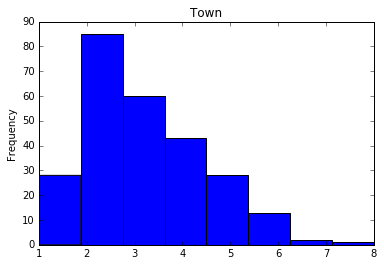

In [11]:
# now a histogram of town
df_agency['Town'].value_counts().plot.hist(bins=8,sharex=False,title='Town')
print 'There are: ',len(df_agency['Town'].value_counts()), ' unique town entries'

There are:  33  unique State entries


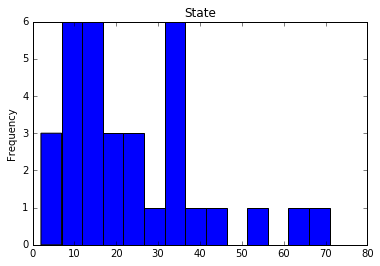

In [8]:
# let's produce a histogram of states
df_agency['State'].value_counts().plot.hist(bins=14,sharex=False,title='State')
print 'There are: ', len(df_agency['State'].value_counts()), ' unique State entries'

In [10]:
# finally let's look at some of the larger count values...
print df_agency.groupby(by='Town', 
                         as_index=False)['AgencyId'].count().sort_values(by='AgencyId',ascending=False).head(10)

print df_agency.groupby(by='State', 
                         as_index=False)['AgencyId'].count().sort_values(by='AgencyId',ascending=False).head(10)

                        Town  AgencyId
8    2013 AG. MEGA NAUCALPAN         8
142            2355 JALAPA I         7
7       2011 AG. SAN ANTONIO         7
207     2468 MATAMOROS BIMBO         6
236         2555 ENSENADA II         6
134       2322 ZAMORA MADERO         6
17      2029 AG.IZTAPALAPA 2         6
178       2396 RUIZ CORTINEZ         6
227             2505 TORREON         6
117       2290 DURANGO BIMBO         6
               State  AgencyId
9   ESTADO DE MÉXICO        71
16      MÉXICO, D.F.        65
13           JALISCO        55
30          VERACRUZ        45
10        GUANAJUATO        39
26            SONORA        34
20            PUEBLA        34
18        NUEVO LEÓN        34
14         MICHOACÁN        33
28        TAMAULIPAS        32


### Summary
The agency look up has 790 approx entries and contains 2 useful aggregation features: Town and State
We can add the town and state features to the training dataset by way of a join on AgencyId